# EDA and Data Cleaning

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv(r"C:\jupyter stuff\data\water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [2]:
df.shape

(3276, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.shape

(3276, 10)

In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

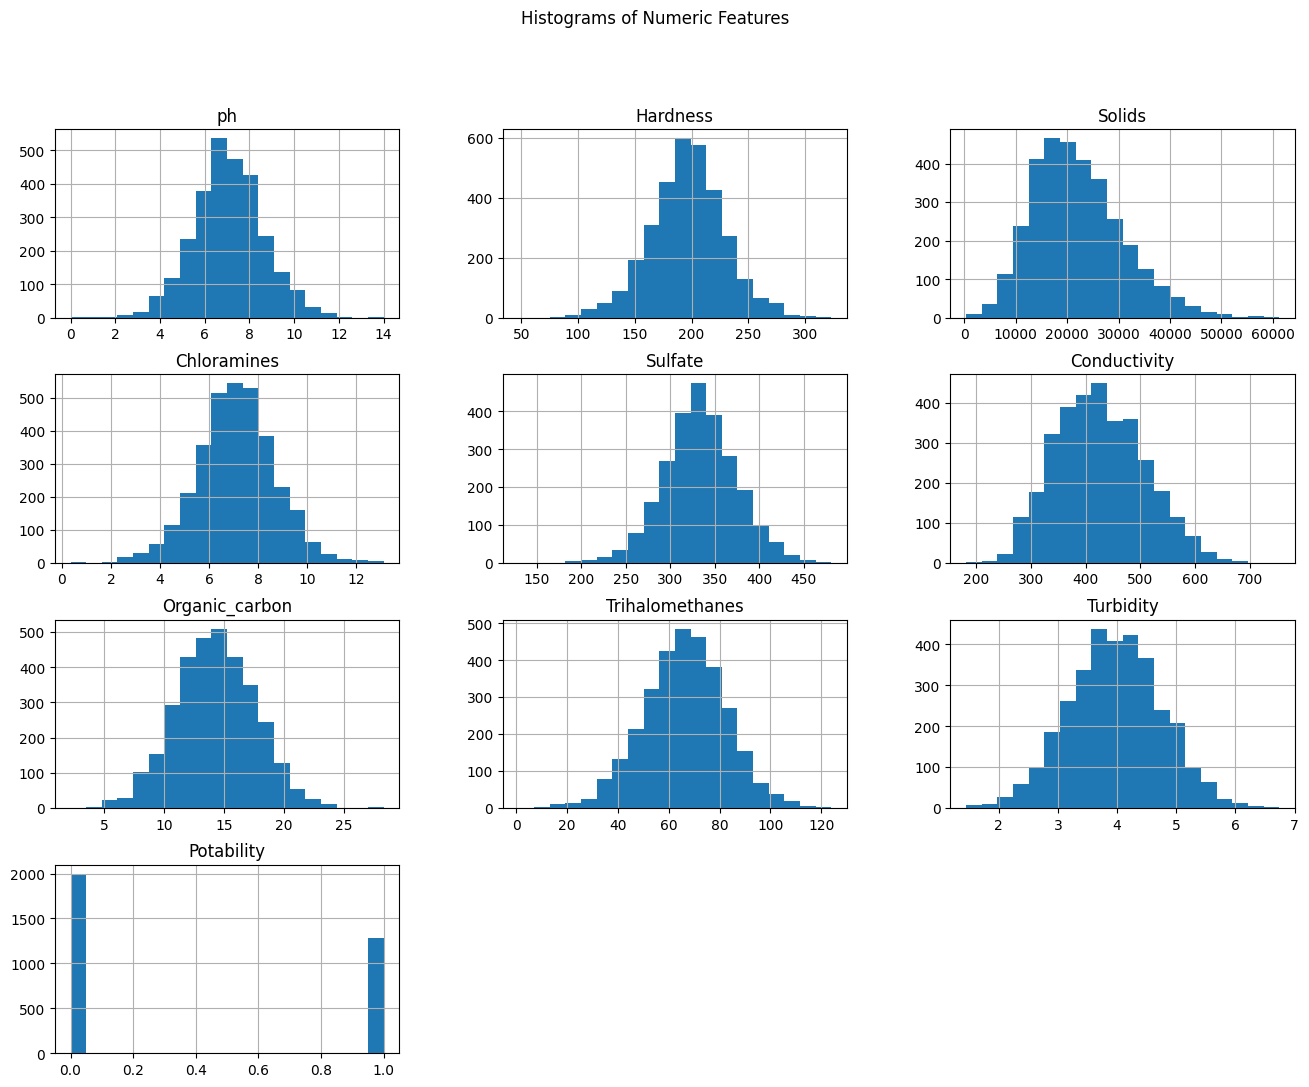

In [9]:
df.hist(bins=20, figsize=(16, 12))
plt.suptitle('Histograms of Numeric Features')
plt.show()

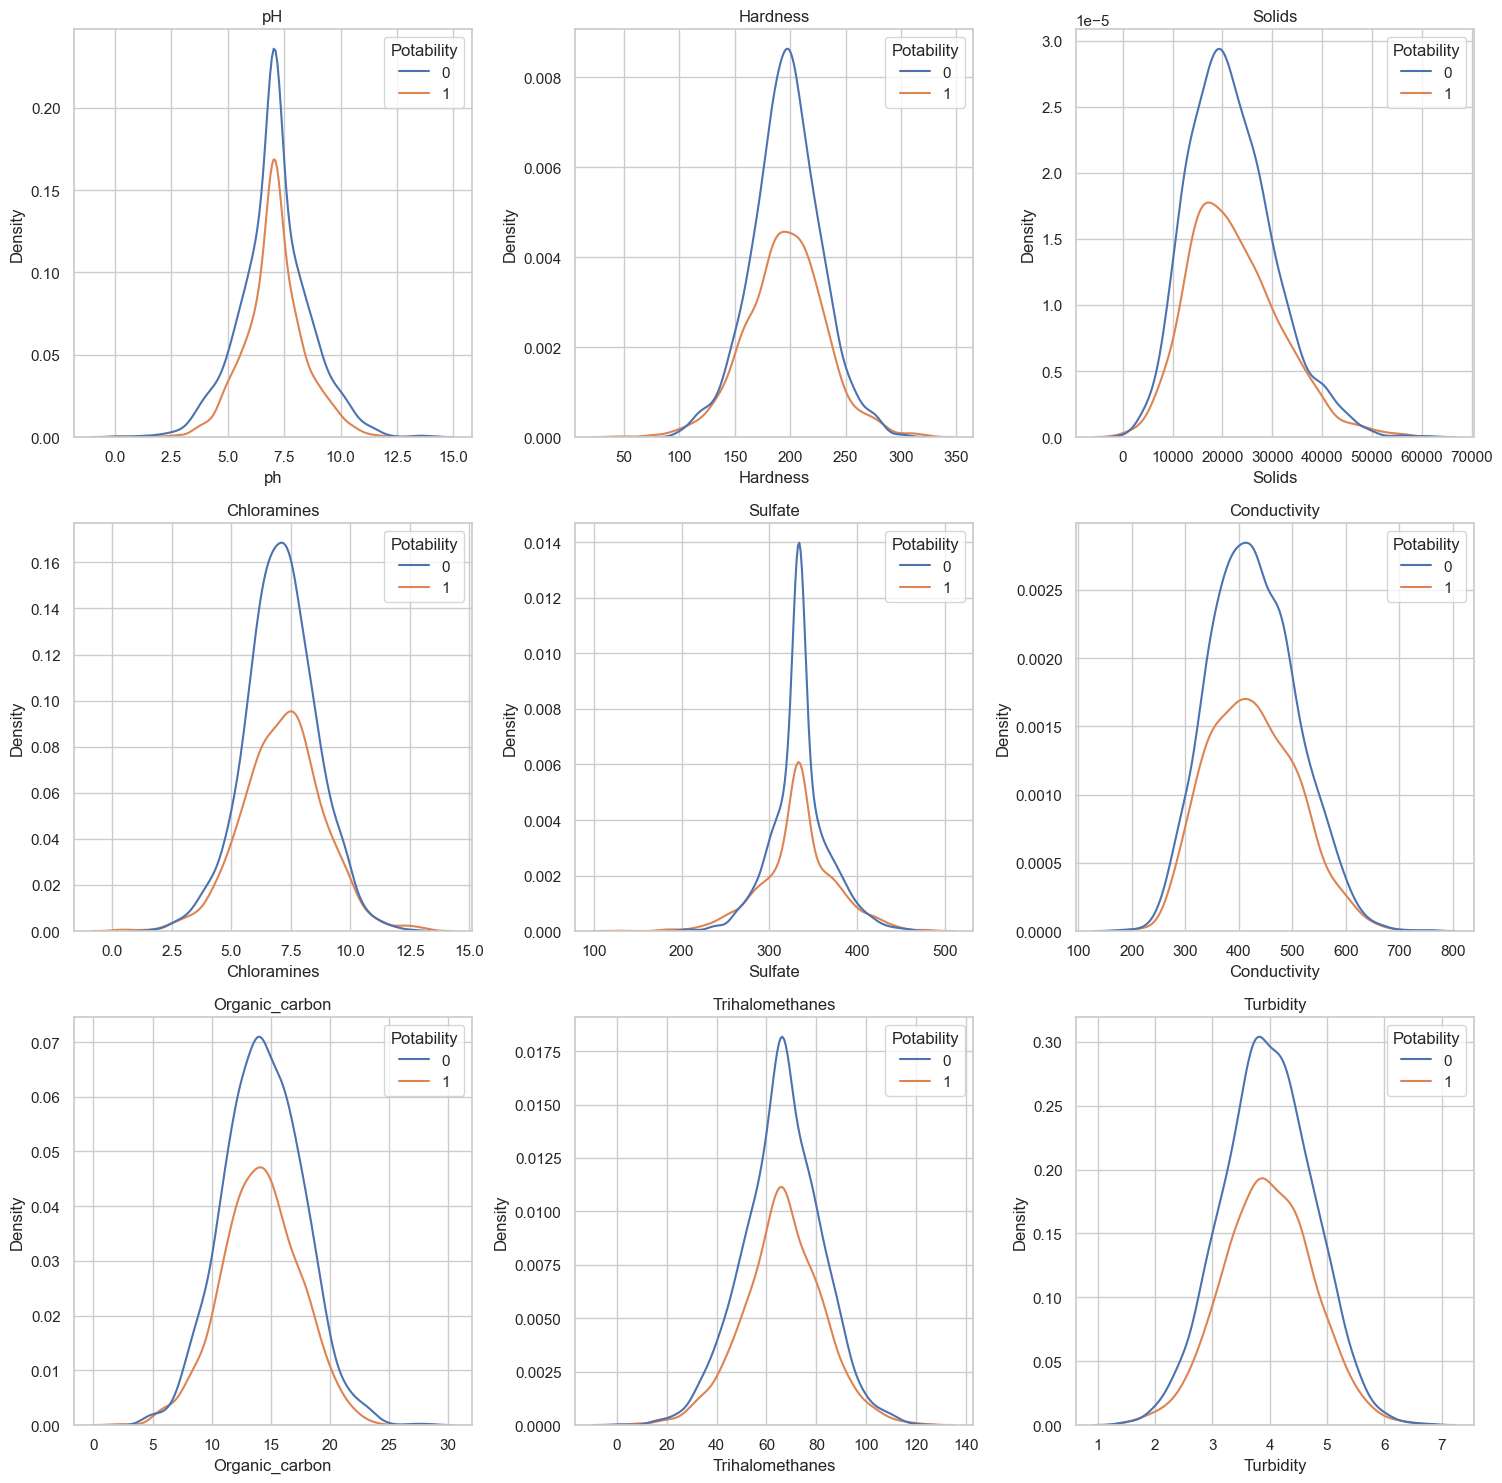

In [36]:
sns.color_palette("husl", 9)
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize']=[15,15]

plt.subplot(3,3,1)
plt.title('pH')
sns.kdeplot(x=df['ph'], hue=df['Potability'])

plt.subplot(3,3,2)
plt.title('Hardness')
sns.kdeplot(x=df['Hardness'], hue=df['Potability'])

plt.subplot(3,3,3)
plt.title('Solids')
sns.kdeplot(x=df['Solids'], hue=df['Potability'])

plt.subplot(3,3,4)
plt.title('Chloramines')
sns.kdeplot(x=df['Chloramines'], hue=df['Potability'])

plt.subplot(3,3,5)
plt.title('Sulfate')
sns.kdeplot(x=df['Sulfate'], hue=df['Potability'])

plt.subplot(3,3,6)
plt.title('Conductivity')
sns.kdeplot(x=df['Conductivity'], hue=df['Potability'])

plt.subplot(3,3,7)
plt.title('Organic_carbon')
sns.kdeplot(x=df['Organic_carbon'], hue=df['Potability'])

plt.subplot(3,3,8)
plt.title('Trihalomethanes')
sns.kdeplot(x=df['Trihalomethanes'], hue=df['Potability'])

plt.subplot(3,3,9)
plt.title('Turbidity')
sns.kdeplot(x=df['Turbidity'], hue=df['Potability'])

plt.tight_layout()

<Axes: >

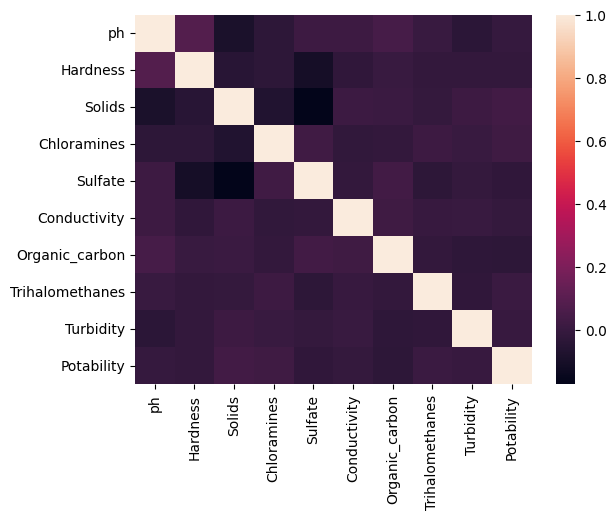

In [10]:
sns.heatmap(df.corr())

In [11]:
skewness = df.skew()

# Display skewness values
print("Skewness values:")
print(skewness)

Skewness values:
ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
Potability         0.450784
dtype: float64


In [12]:
#replaced null values of all columns
for column in df.columns:
    if column=='Solids':
        df[column].fillna(df[column].median(), inplace=True) #used median since it had a high skew value and might've been sensitive to outliers
    else:
        df[column].fillna(df[column].mean(), inplace=True)

In [13]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [14]:
X=df.drop('Potability', axis=1)
y=df.Potability

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
y_train.shape, X_test.shape

((2293,), (983, 9))

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# X_train['Scaled_fare']=scaler.fit_transform(X_train)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
column_mapping = {
    0: 'ph',
    1: 'Hardness',
    2: 'Solids',
    3: 'Chloramines',
    4: 'Sulfate',
    5: 'Conductivity',
    6: 'Organic_carbon',
    7: 'Trihalomethanes',
    8: 'Turbidity',
    9: 'Potability'
}

# Rename columns using the mapping
X_train.rename(columns=column_mapping, inplace=True)
X_test.rename(columns=column_mapping, inplace=True)

In [24]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [25]:
X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.002862,-1.076741,0.399266,-0.212240,0.002242,0.521178,-0.047250,-0.907162,0.698268
1,-1.134867,-1.689710,-0.539582,1.867717,-0.146545,0.588337,-0.913657,-0.619105,1.096595
2,-0.589646,-0.826736,0.063692,-1.438226,-0.173414,1.539569,0.837523,-0.958879,-0.097340
3,-0.121871,0.974189,-1.265386,0.423039,0.785540,1.090266,-0.473310,-1.645106,0.220762
4,-0.717469,-1.685820,-0.155796,-0.144219,0.002242,0.038300,-1.782793,0.029527,-1.567913


In [26]:
X_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-1.460548,-1.033930,0.088341,-1.981168,0.738683,1.446137,-0.815205,-0.026492,-0.170518
1,0.079144,0.336086,-1.146600,0.565416,0.002242,-0.704370,-1.182637,-0.299404,2.222176
2,-0.136089,0.416832,-0.874643,0.072814,-0.465249,1.802861,0.516164,0.237714,0.170072
3,0.954289,-0.084213,-0.085495,-0.013635,0.002242,-0.403916,-0.187836,-0.356549,2.106493
4,-0.298027,0.900736,-0.938779,1.232179,-2.093717,-1.874353,-0.450573,-0.026492,-0.207685


# Bagging

In [22]:
#Bagging

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

bag_model=BaggingClassifier(
    estimator=RandomForestClassifier(),
    n_estimators=100,
    max_samples=0.8,
    random_state=0
)

bag_model.fit(X_train, y_train)
bagging_score=bag_model.score(X_test, y_test)

In [27]:
bagging_score

0.6602238046795524

# XGBoost

In [28]:
from xgboost import XGBRegressor
import xgboost as xgb

xgb_model=XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

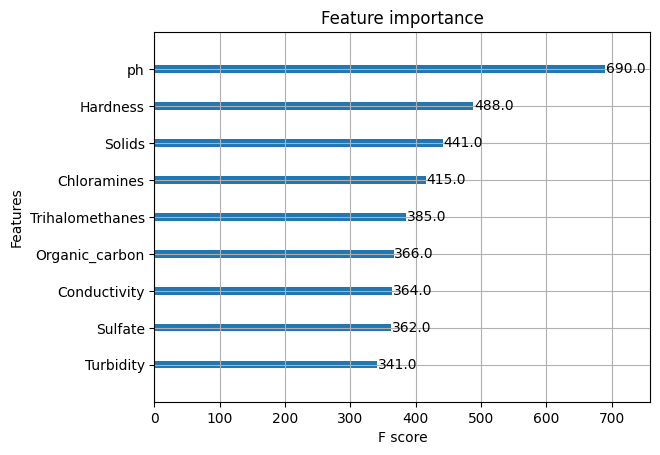

In [29]:
xgb.plot_importance(xgb_model, ax=plt.gca())

In [30]:
pred_probs=xgb_model.predict(X_test)
preds=np.round(pred_probs)
preds[:10]

array([ 1.,  1.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.], dtype=float32)

In [31]:
y_test[:10]

887     0
1135    1
1047    0
1093    1
2073    0
1270    0
2057    0
3060    0
2289    0
2331    1
Name: Potability, dtype: int64

In [32]:
pred_train=xgb_model.predict(X_train)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_train, pred_train))

0.9474181430650953


In [34]:
print(mean_squared_error(y_train, pred_train))

0.012502800582522974


In [35]:
from sklearn.metrics import accuracy_score
xgb_accuracy=accuracy_score(y_test, preds)
xgb_accuracy

0.6144455747711088

# KNN 

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_pred=knn.predict(X_test)
y_pred[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [95]:
knn.predict_proba(X_test)[:,0]

array([0.66666667, 1.        , 1.        , 0.66666667, 1.        ,
       0.33333333, 0.33333333, 1.        , 0.33333333, 0.33333333,
       1.        , 0.33333333, 0.66666667, 0.33333333, 0.33333333,
       0.33333333, 0.66666667, 0.66666667, 1.        , 0.33333333,
       0.33333333, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.        , 0.33333333, 1.        , 1.        ,
       1.        , 0.66666667, 0.66666667, 1.        , 1.        ,
       1.        , 1.        , 0.        , 0.33333333, 0.33333333,
       1.        , 0.33333333, 1.        , 0.33333333, 0.        ,
       0.66666667, 0.66666667, 1.        , 0.66666667, 0.66666667,
       1.        , 0.33333333, 0.66666667, 0.        , 0.66666667,
       0.33333333, 0.66666667, 1.        , 0.66666667, 0.33333333,
       0.66666667, 0.66666667, 1.        , 0.66666667, 0.33333333,
       0.66666667, 0.66666667, 1.        , 0.33333333, 1.        ,
       0.        , 0.        , 0.66666667, 1.        , 1.     

The best value of k is: 33
Accuracy scores for each k:
k=3:  0.6119
k=4:  0.6271
k=5:  0.6302
k=6:  0.6433
k=7:  0.6306
k=8:  0.6446
k=9:  0.6289
k=10:  0.6385
k=11:  0.6345
k=12:  0.6341
k=13:  0.6393
k=14:  0.6359
k=15:  0.6389
k=16:  0.6420
k=17:  0.6402
k=18:  0.6454
k=19:  0.6415
k=20:  0.6450
k=21:  0.6398
k=22:  0.6428
k=23:  0.6407
k=24:  0.6406
k=25:  0.6398
k=26:  0.6420
k=27:  0.6411
k=28:  0.6420
k=29:  0.6398
k=30:  0.6428
k=31:  0.6454
k=32:  0.6446
k=33:  0.6494
k=34:  0.6441
k=35:  0.6441
k=36:  0.6424
k=37:  0.6454
k=38:  0.6420
k=39:  0.6428
k=40:  0.6393
k=41:  0.6411
k=42:  0.6433
k=43:  0.6446
k=44:  0.6433
k=45:  0.6437
k=46:  0.6402
k=47:  0.6437
k=48:  0.6393
k=49:  0.6428
k=50:  0.6407
Model accuracy score with the best k value:  0.646


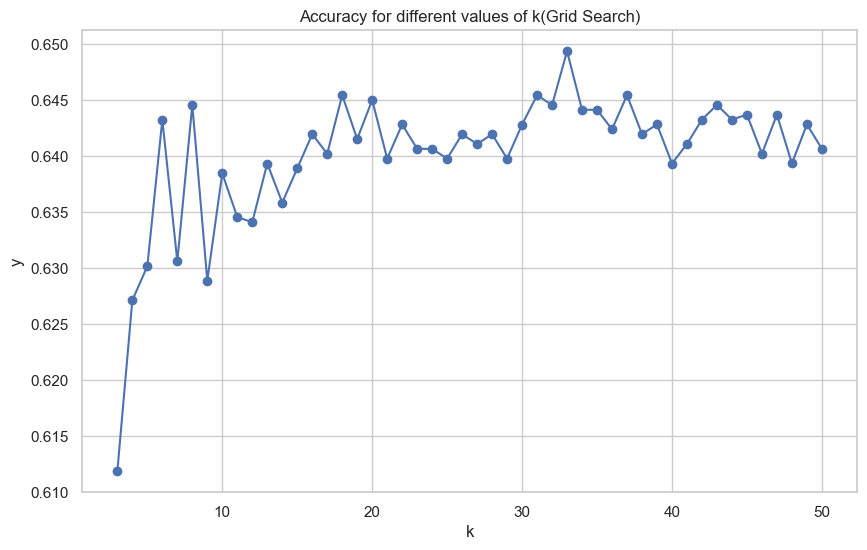

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

param_grid={'n_neighbors': range(3,51)}

knn=KNeighborsClassifier()

grid_search=GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_k=grid_search.best_params_['n_neighbors']

print(f"The best value of k is: {best_k}")

print("Accuracy scores for each k:")

for k, score in zip(grid_search.cv_results_['param_n_neighbors'], grid_search.cv_results_['mean_test_score']):
    print(f'k={k}: {score: .4f}')

y_pred=grid_search.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)

print(f'Model accuracy score with the best k value: {accuracy: .3f}')

plt.figure(figsize=(10,6))

plt.plot(range(3, 51), grid_search.cv_results_['mean_test_score'], marker='o', linestyle='-', color='b')

plt.title('Accuracy for different values of k(Grid Search)')
plt.xlabel('k')
plt.ylabel('y')
plt.grid(True)
plt.show()

Best k value: 43


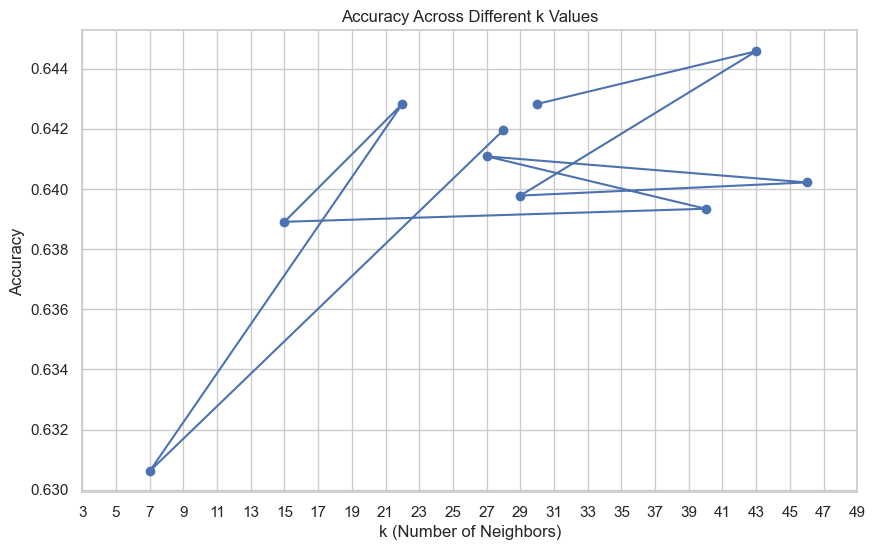

Model accuracy score with best k=43: 0.6460


In [43]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_neighbors': np.arange(3, 51)}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, random_state=42, cv=5, scoring='accuracy')

# Fit the randomized search to the training set
random_search.fit(X_train, y_train)

# Get the best k value from the search
best_k = random_search.best_params_['n_neighbors']

# Print the best k value
print(f'Best k value: {best_k}')

results = random_search.cv_results_
k_values = results['param_n_neighbors'].data.astype(int)
accuracy_scores = results['mean_test_score']

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy Across Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(3, 51, step=2))
plt.grid(True)

plt.show()

# Instantiate the model with the best k value
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)

# Fit the model to the training set
best_knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best_k = best_knn_model.predict(X_test)

# Print the accuracy score with the best k value
accuracy_best_k = accuracy_score(y_test, y_pred_best_k)
print(f'Model accuracy score with best k={best_k}: {accuracy_best_k:.4f}')

In [44]:
knn_33=KNeighborsClassifier(n_neighbors=33)
knn_33.fit(X_train, y_train)
y_pred_33=knn_33.predict(X_test)
print('Model accuracy with k=27: {0:0.4f}'.format(accuracy_score(y_test, y_pred_33)))

Model accuracy with k=27: 0.6460


# Performance Metric analysis:

# 1. Confusion Matrix

<Axes: >

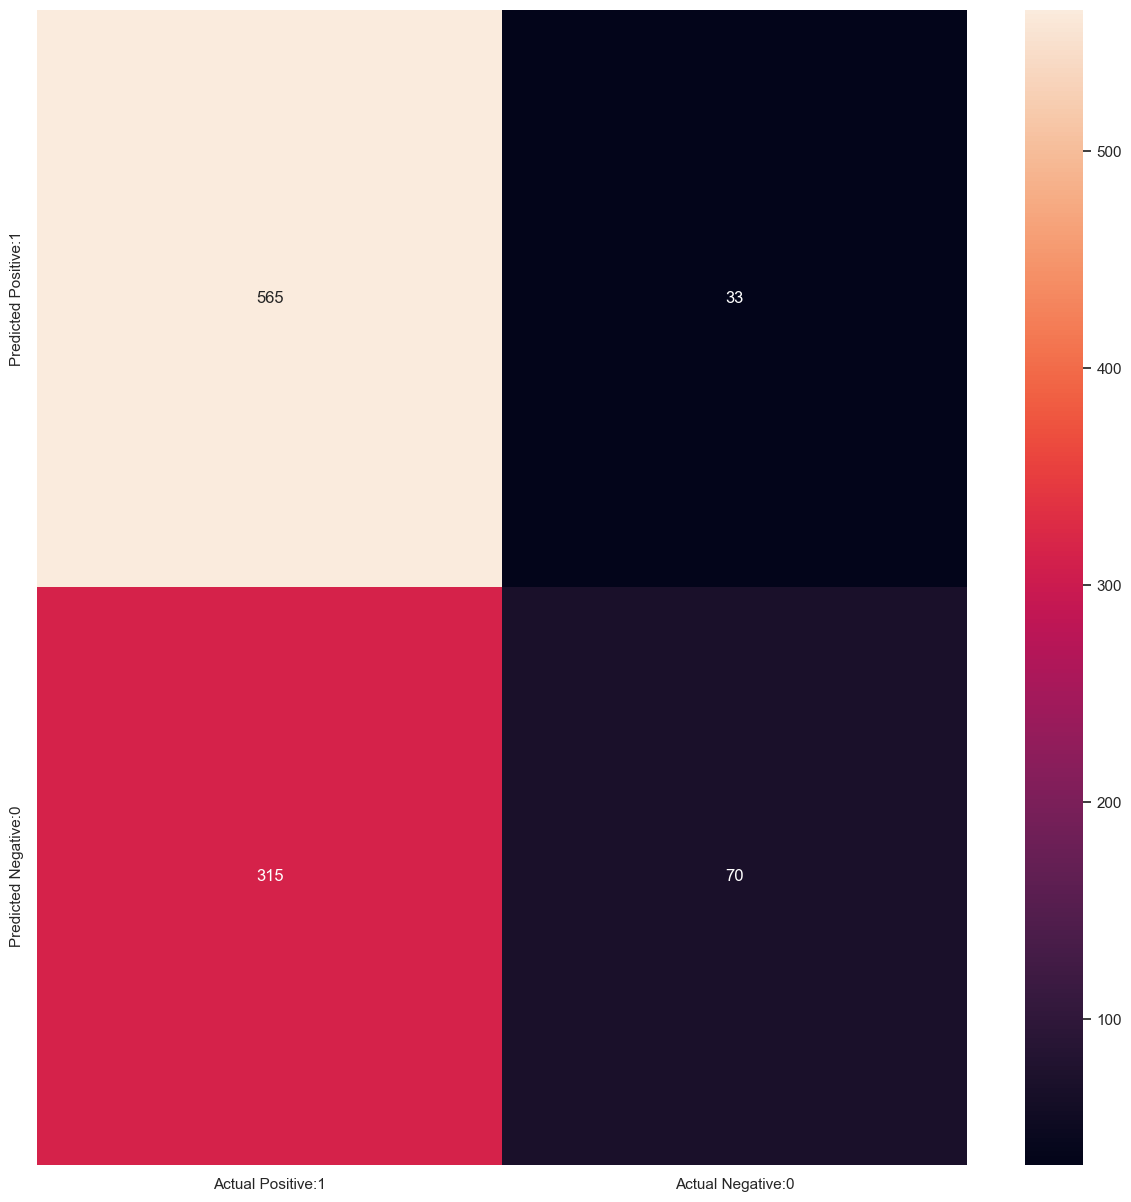

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_33)

cm_df=pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predicted Positive:1','Predicted Negative:0'])

sns.heatmap(cm_df,annot=True,fmt='d')

# 2.Distance Metrics

Accuracy with Euclidean distance:0.6226
Accuracy with Manhattan distance:0.6358
Accuracy with Chebyshev distance:0.6083
Accuracy with Minkowski distance:0.6226


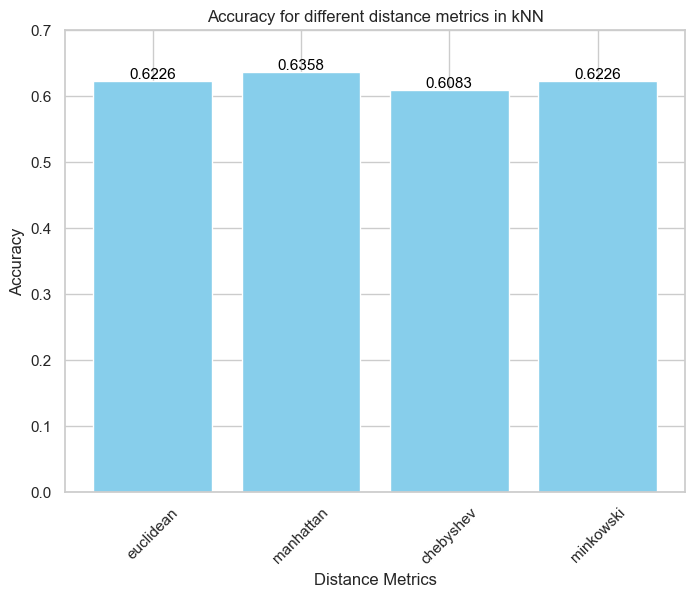

In [47]:
#Distance Metrics

distance_metrics=['euclidean', 'manhattan', 'chebyshev', 'minkowski']
accuracies={}

for metric in distance_metrics:
    model=KNeighborsClassifier(metric=metric)
    model.fit(X_train, y_train)
    predictions=model.predict(X_test)
    acc=accuracy_score(predictions, y_test)
    accuracies[metric]=acc
    
for metric, acc in accuracies.items():
    print(f"Accuracy with {metric.capitalize()} distance:{acc:.4f}")
    
plt.figure(figsize=(8,6))
bars=plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title('Accuracy for different distance metrics in kNN')
plt.xlabel('Distance Metrics')
plt.ylabel('Accuracy')
plt.ylim(0.0,0.7)
plt.xticks(rotation=45)
    
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom', color='black', fontsize=11)

plt.show()

Best k value with Euclidean distance: 25
Accuracy with best k value (25): 0.6460

Best k value with Manhattan distance: 10
Accuracy with best k value (10): 0.6511

Best k value with Chebyshev distance: 39
Accuracy with best k value (39): 0.6389

Best k value with Minkowski distance: 25
Accuracy with best k value (25): 0.6460



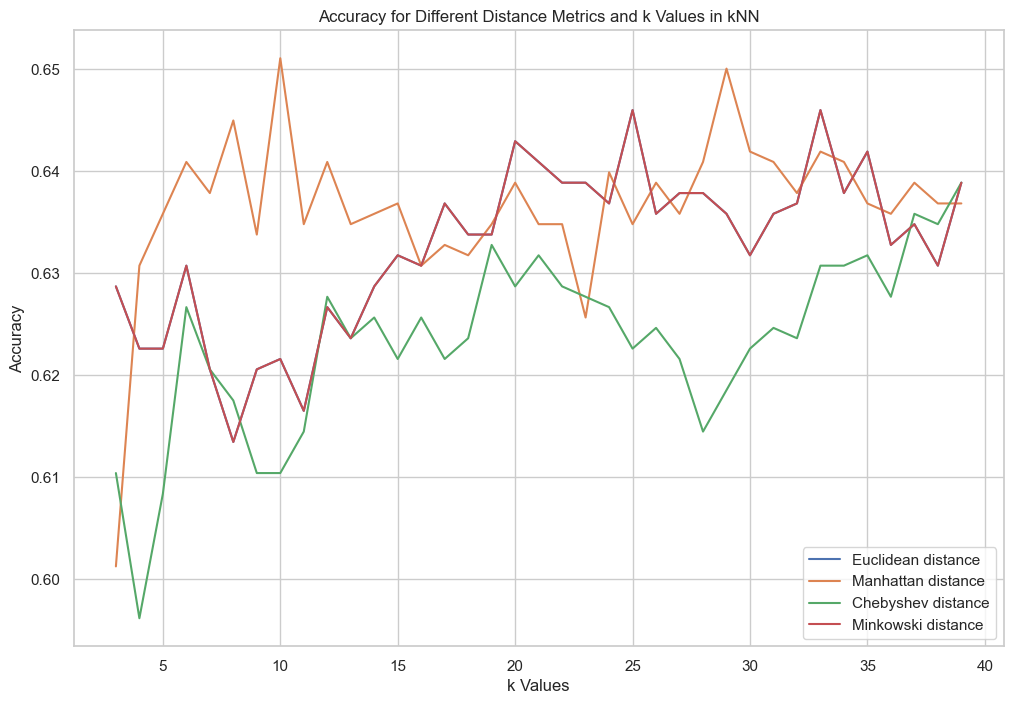

In [48]:
accuracies = {}
best_k_values = {}
k_values=np.arange(3,40)
# Iterate over each distance metric
for metric in distance_metrics:
    accuracies[metric] = []
    
    # Iterate over each k value
    for k in k_values:
        # Create and fit KNeighborsClassifier
        model = KNeighborsClassifier(metric=metric, n_neighbors=k)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Calculate accuracy and store in the list
        acc = accuracy_score(predictions, y_test)
        accuracies[metric].append(acc)
    
    # Find the best k value for each distance metric
    best_k = k_values[np.argmax(accuracies[metric])]
    best_k_values[metric] = best_k
    print(f"Best k value with {metric.capitalize()} distance: {best_k}")

    # Calculate accuracy for the best k value
    best_model = KNeighborsClassifier(metric=metric, n_neighbors=best_k)
    best_model.fit(X_train, y_train)
    best_predictions = best_model.predict(X_test)
    best_accuracy = accuracy_score(best_predictions, y_test)
    print(f"Accuracy with best k value ({best_k}): {best_accuracy:.4f}\n")
plt.figure(figsize=(12, 8))

for metric, acc_list in accuracies.items():
    plt.plot(k_values, acc_list, label=f'{metric.capitalize()} distance')

plt.title('Accuracy for Different Distance Metrics and k Values in kNN')
plt.xlabel('k Values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 3. Classification Report

In [50]:
from sklearn.metrics import classification_report

target_names = ['not potable','potable']
print(classification_report(y_test, y_pred_33, target_names=target_names))

              precision    recall  f1-score   support

 not potable       0.64      0.94      0.76       598
     potable       0.68      0.18      0.29       385

    accuracy                           0.65       983
   macro avg       0.66      0.56      0.53       983
weighted avg       0.66      0.65      0.58       983

